In [1]:
from sklearn.datasets import make_blobs
## ALL USE CASE CODE

from sklearn.preprocessing  import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## ALL USE CASE CODE

from sklearn.preprocessing  import StandardScaler, PolynomialFeatures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
#from mlxtend.evaluate import bias_variance_decomp
# KMEANS
from sklearn.cluster import KMeans
# deciiosn tree


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import r2_score, confusion_matrix, mean_absolute_error, mean_squared_error, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
# %matplotlib inline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.feature_extraction import DictVectorizer, FeatureHasher
from sklearn import tree

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from keras.models import  Sequential
from keras import models, layers
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from keras.layers.core.activation import Activation
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow_hub as hub
import PIL.Image as Image


from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
# K nearest eighbor for  classification with BEST HYPER TUNED PARAMS
from sklearn.neighbors import KNeighborsClassifier
# HYPER TUNE FOR BOOSTING and BAGGING ALGOROTHMN
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from numpy import mean
from numpy import std
import math

In [48]:
ds =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/Consume.csv')

In [49]:
ds

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01-01-2015,"27,3","23,9","32,5",0,0,25.461
1,02-01-2015,"27,02","24,5","33,5",0,0,28.972
2,03-01-2015,"24,82","22,4","29,9",0,1,30.814
3,04-01-2015,"23,98","21,5","28,6","1,2",1,29.799
4,05-01-2015,"23,82",21,"28,3",0,0,28.900
...,...,...,...,...,...,...,...
360,27-12-2015,24,"21,1","28,2","13,6",1,32.307
361,28-12-2015,"22,64","21,1","26,7",0,0,26.095
362,29-12-2015,"21,68","20,3","24,1","10,3",0,22.309
363,30-12-2015,"21,38","19,3","22,4","6,3",0,20.467


In [50]:
ds.columns = ['Date','TempMid','TempMin','TempMax','Precip','Semana','Litres']

In [51]:
ds

,Date,TempMid,TempMin,TempMax,Precip,Semana,Litres
0,01-01-2015,"27,3","23,9","32,5",0,0,25.461
1,02-01-2015,"27,02","24,5","33,5",0,0,28.972
2,03-01-2015,"24,82","22,4","29,9",0,1,30.814
3,04-01-2015,"23,98","21,5","28,6","1,2",1,29.799
4,05-01-2015,"23,82",21,"28,3",0,0,28.900
...,...,...,...,...,...,...,...
360,27-12-2015,24,"21,1","28,2","13,6",1,32.307
361,28-12-2015,"22,64","21,1","26,7",0,0,26.095
362,29-12-2015,"21,68","20,3","24,1","10,3",0,22.309
363,30-12-2015,"21,38","19,3","22,4","6,3",0,20.467


In [52]:
ds.isnull().sum()

Date       0
TempMid    0
TempMin    0
TempMax    0
Precip     0
Semana     0
Litres     0
dtype: int64

In [53]:
ds['Date'] =  pd.to_datetime(ds['Date'])
ds['TempMid'] = ds['TempMid'].str.replace(',','.').astype('float64')
ds['TempMin'] = ds['TempMin'].str.replace(',','.').astype('float64')
ds['TempMax'] = ds['TempMax'].str.replace(',','.').astype('float64')
ds['Precip'] = ds['Precip'].str.replace(',','.').astype('float64')

In [54]:
ds

,Date,TempMid,TempMin,TempMax,Precip,Semana,Litres
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-02-01,27.02,24.5,33.5,0.0,0,28.972
2,2015-03-01,24.82,22.4,29.9,0.0,1,30.814
3,2015-04-01,23.98,21.5,28.6,1.2,1,29.799
4,2015-05-01,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,2015-12-27,24.00,21.1,28.2,13.6,1,32.307
361,2015-12-28,22.64,21.1,26.7,0.0,0,26.095
362,2015-12-29,21.68,20.3,24.1,10.3,0,22.309
363,2015-12-30,21.38,19.3,22.4,6.3,0,20.467


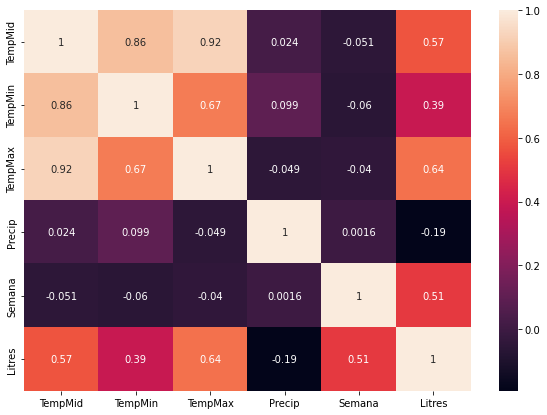

In [55]:
correlation = ds.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True)

In [56]:
#******************************************  OUTLIER DETECTION  **************************************
#  LETS FIND THE OUTLIER DETECTION ON THE DATASET
#******************************************  OUTLIER DETECTION  **************************************


from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import LocalOutlierFactor

In [57]:
#ds[0:5]
X  = ds.iloc[:,1:6].values
y  = ds.iloc[:,6].values

In [58]:
print(X)
print(X.shape)

[[27.3  23.9  32.5   0.    0.  ]
 [27.02 24.5  33.5   0.    0.  ]
 [24.82 22.4  29.9   0.    1.  ]
 ...
 [21.68 20.3  24.1  10.3   0.  ]
 [21.38 19.3  22.4   6.3   0.  ]
 [24.76 20.2  29.    0.    0.  ]]
(365, 5)


In [59]:
print(y)
print(y.shape)

[25.461 28.972 30.814 29.799 28.9   28.218 29.732 28.397 24.886 37.937
 36.254 25.743 26.99  31.825 25.724 29.938 37.69  30.524 29.265 35.127
 29.13  25.795 21.784 28.348 31.088 21.52  29.972 22.603 22.696 26.845
 27.03  32.057 24.097 31.655 24.738 19.95  22.821 28.893 29.926 24.062
 21.137 26.805 26.389 24.219 30.231 24.968 25.343 17.399 21.392 22.922
 24.567 30.943 30.825 25.692 26.959 25.366 22.784 26.241 26.467 27.475
 28.749 24.146 22.988 30.3   22.654 29.09  24.619 20.016 23.042 22.933
 22.409 21.281 28.844 32.872 20.903 26.275 20.167 23.628 24.213 28.631
 25.855 21.406 21.617 22.401 27.989 24.974 29.76  26.116 25.85  24.925
 21.979 22.116 24.867 33.45  32.713 22.356 21.004 23.362 20.298 24.862
 30.505 25.07  22.62  22.001 23.469 21.735 21.593 33.822 28.028 24.304
 31.108 19.113 23.198 24.388 27.42  30.479 21.838 20.812 19.761 20.452
 17.939 25.272 28.049 25.317 21.826 20.68  19.143 18.146 25.489 23.537
 16.956 19.052 17.287 20.3   20.538 23.702 28.411 21.073 24.215 19.525
 20.78

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [61]:
y_train.shape

(244,)

In [62]:
X_train.shape

(244, 5)

In [63]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print(" -- CALCULATING THE MAE SCORE BEFORE REMOVING OUTLIERS -- ")
print('    MAE: %.3f' % mae)

 -- CALCULATING THE MAE SCORE BEFORE REMOVING OUTLIERS -- 
    MAE: 2.048


In [ ]:
#  The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem
#  Removing these outliers from the training set will allow a more effective model to be learned.
#  Achieve this by defining the LocalOutlierFactor model and using it to make a prediction on the training dataset
#  USING THE LOF CLASS FROM LOCALOUTLIERFACTOR

In [65]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [66]:
# select all rows that are not outliers
mask = yhat != -1
print(mask)
print(yhat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True False  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [67]:
X_train2, y_train2 = X_train[mask, :], y_train[mask]

In [68]:
y_train2.shape

(232,)

In [69]:
X_train2.shape

(232, 5)

In [70]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

LinearRegression()

In [71]:

# evaluate the model
yhat = model2.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print(" -- CALCULATING THE MAE SCORE AFTER REMOVING OUTLIERS -- ")
print('    MAE: %.3f' % mae)


 -- CALCULATING THE MAE SCORE AFTER REMOVING OUTLIERS -- 
    MAE: 2.050


In [ ]:
# CORSS VALIDATING THE SAMPLE SET

In [54]:
########################## BASE ESTIMATOR DECISION TREE BY DEFAULT
#cross_val_score 
# creating the bagging regressor model
model = BaggingRegressor()
#########################If None, then the base estimator is a ~sklearn.tree.DecisionTreeRegressor.
# defining the Cross validation for best params
cv =  RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores =  cross_val_score(model, X, y, cv=cv)

print(' MEAN %.3f , STANDARDDEV %.3f' % (mean(scores), std(scores)))


 MEAN 0.584 , STANDARDDEV 0.088


In [57]:
model.fit(X_train, y_train)

BaggingRegressor()

In [59]:
model.score(X_test,y_test)

0.6262689635034213

In [64]:

# 360	2015-12-27	24.00	21.1	28.2	13.6	1	32.307
# 361	2015-12-28	22.64	21.1	26.7	0.0	0	26.095
# 362	2015-12-29	21.68	20.3	24.1	10.3	0	22.309
demoval = [[21.68,20.3,24.1,10.3,0]]
yhat  = model.predict(demoval)
print('Prediction: %.2f' % yhat)

Prediction: 22.64
[22.638]


In [83]:
########################## BASE ESTIMATOR SVN THIS TIME
#cross_val_score 
# creating the bagging regressor model
from sklearn.svm import SVR
#model2 = BaggingRegressor(base_estimator=[SVR(), LinearRegression()], n_estimators=2)
#model2 = BaggingRegressor(base_estimator=LinearRegression())
model2 = BaggingRegressor(base_estimator=SVR())
#########################If None, then the base estimator is a ~sklearn.tree.DecisionTreeRegressor.
# defining the Cross validation for best params
cv2 =  RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores2 =  cross_val_score(model2, X, y, cv=cv2)
print(' MEAN %.3f , STANDARDDEV %.3f' % (mean(scores2), std(scores2)))

 MEAN 0.692 , STANDARDDEV 0.065


In [84]:
model2.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression())

In [85]:
model2.score(X_test,y_test)

0.7407255455245535

In [86]:

# 360	2015-12-27	24.00	21.1	28.2	13.6	1	32.307
# 361	2015-12-28	22.64	21.1	26.7	0.0	0	26.095
# 362	2015-12-29	21.68	20.3	24.1	10.3	0	22.309
demoval2 = [[21.68,20.3,24.1,10.3,0]]
yhat2  = model2.predict(demoval2)
print('Prediction: %.2f' % yhat2)

Prediction: 21.77
